In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score 

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
total = data.drop(columns=['id','Unnamed: 32'])
total.head()
total

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
total['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [6]:
def func(row):
    if 'M' in row:
        return 1
    else:
        return 0
total['diagnosis'] = total['diagnosis'].apply(func)

total.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
total.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

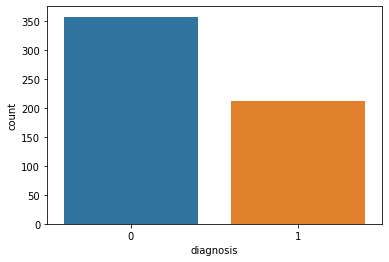

In [8]:
sns.countplot(total['diagnosis'])

In [45]:
train, test = train_test_split(total, test_size=0.2, random_state=42)

x_train = train.drop(['diagnosis'], axis=1)
y_train = train.diagnosis

x_test = test.drop(['diagnosis'], axis=1)
y_test = test.diagnosis
print(len(train), len(test))

455 114


In [46]:
SVM = svm.SVC()
SVM.fit(x_train, y_train)
y_pred = SVM.predict(x_test)

print('SVM: ', accuracy_score(y_pred,y_test)*100)

SVM:  94.73684210526315


In [47]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)

print('DT: ', accuracy_score(y_pred,y_test)*100)

DT:  92.98245614035088


In [12]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('knn: ', accuracy_score(y_pred,y_test)*100)

knn:  95.6140350877193


In [13]:
LR = LogisticRegression(max_iter=1000)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

print('LR: ', accuracy_score(y_pred,y_test)*100)

LR:  95.6140350877193


C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
top_features = pd.Series(
    DT.feature_importances_,
    index=x_train.columns
).sort_values(ascending=False)

print(top_features)

concave points_mean        0.691420
concave points_worst       0.065651
radius_worst               0.052299
perimeter_worst            0.051494
texture_worst              0.040185
texture_mean               0.027669
concavity_se               0.018554
concave points_se          0.015931
fractal_dimension_se       0.014345
radius_se                  0.011983
smoothness_worst           0.009233
smoothness_se              0.001237
area_worst                 0.000000
symmetry_se                0.000000
compactness_worst          0.000000
concavity_worst            0.000000
symmetry_worst             0.000000
radius_mean                0.000000
compactness_se             0.000000
area_se                    0.000000
perimeter_se               0.000000
texture_se                 0.000000
fractal_dimension_mean     0.000000
symmetry_mean              0.000000
concavity_mean             0.000000
compactness_mean           0.000000
smoothness_mean            0.000000
area_mean                  0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se'),
  Text(15, 0, 'compactness_se'),
  Text(16, 0, 'concavity_se'),
  Text(17, 0, 'concave points_se'),
  Text(18, 0, 'symmetry_se'),
  Text(19, 0, 'fractal_dimension_se'),
  Text(20, 0, 'radius_worst'),
  Text(21, 0, 'texture_worst'),
  Text(22, 0, 'perimeter_worst'),
  Text(23, 0, 'area_worst'),
  Text(24, 0, 'smoothness_worst'),
  Text(25, 0, 'compactness_worst'),
  Text(26, 0, 'concavity_

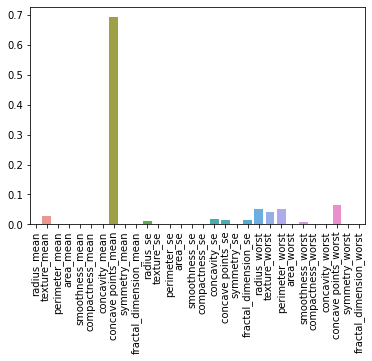

In [24]:
sns.barplot(x = x_train.columns, y = DT.feature_importances_)
plt.xticks(rotation=90)

In [25]:
Top_5 = top_features.keys()[:5]
print(Top_5)

Index(['concave points_mean', 'concave points_worst', 'radius_worst',
       'perimeter_worst', 'texture_worst'],
      dtype='object')


In [26]:
total['concave points_mean'].max(), total['concave points_mean'].min()

(0.2012, 0.0)

In [27]:
total['concave points_worst'].max(), total['concave points_worst'].min()

(0.291, 0.0)

In [28]:
total['radius_worst'].max(), total['radius_worst'].min()

(36.04, 7.93)

In [29]:
total['perimeter_worst'].max(), total['perimeter_worst'].min()

(251.2, 50.41)

In [30]:
total['texture_worst'].max(), total['texture_worst'].min()

(49.54, 12.02)

In [31]:
Top_feature_list = total[['diagnosis','concave points_mean','concave points_worst','radius_worst','perimeter_worst','texture_worst']]
Top_feature_list

,diagnosis,concave points_mean,concave points_worst,radius_worst,perimeter_worst,texture_worst
0,1,0.14710,0.2654,25.380,184.60,17.33
1,1,0.07017,0.1860,24.990,158.80,23.41
2,1,0.12790,0.2430,23.570,152.50,25.53
3,1,0.10520,0.2575,14.910,98.87,26.50
4,1,0.10430,0.1625,22.540,152.20,16.67
...,...,...,...,...,...,...
564,1,0.13890,0.2216,25.450,166.10,26.40
565,1,0.09791,0.1628,23.690,155.00,38.25
566,1,0.05302,0.1418,18.980,126.70,34.12
567,1,0.15200,0.2650,25.740,184.60,39.42


In [33]:
train, test = train_test_split(Top_feature_list, test_size=0.2, random_state=42)
x_train = train.drop(['diagnosis'], axis=1)
y_train = train.diagnosis
x_test = test.drop(['diagnosis'], axis=1)
y_test = test.diagnosis

SVM.fit(x_train, y_train)
DT.fit(x_train, y_train)
knn.fit(x_train, y_train)
LR.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [34]:
print(SVM.predict([[0,0,7.93,50.41,12.02]]), SVM.predict([[0.2012,0.291,36.04,251.2,49.54]]),SVM.predict([[0.1,0.1,21,150,30]]),
      SVM.predict([[0.15,0.15,30,200,45]]), SVM.predict([[0.05,0.05,10,75,15]]),SVM.predict([[0.07,0.1,15,120,19]]), 
      SVM.predict([[0.07,0.1,15,120,18]]), SVM.predict([[0.06, 0.05,14,119,18]]), SVM.predict([[0.09,0.2,17,122,22]]), 
      SVM.predict([[0.08,0.15,16,121,20]]))

[0] [1] [1] [1] [0] [1] [1] [0] [1] [1]


C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does

In [35]:
print(DT.predict([[0,0,7.93,50.41,12.02]]), DT.predict([[0.2012,0.291,36.04,251.2,49.54]]),DT.predict([[0.1,0.1,21,150,30]]),
      DT.predict([[0.15,0.15,30,200,45]]), DT.predict([[0.05,0.05,10,75,15]]),DT.predict([[0.07,0.1,15,120,19]]), 
      DT.predict([[0.07,0.1,15,120,18]]), DT.predict([[0.06, 0.05,14,119,18]]), DT.predict([[0.09,0.2,17,122,22]]), 
      DT.predict([[0.08,0.15,16,121,20]]))

[0] [1] [1] [1] [0] [1] [1] [1] [1] [1]


C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [36]:
print(knn.predict([[0,0,7.93,50.41,12.02]]), knn.predict([[0.2012,0.291,36.04,251.2,49.54]]),knn.predict([[0.1,0.1,21,150,30]]),
      knn.predict([[0.15,0.15,30,200,45]]), knn.predict([[0.05,0.05,10,75,15]]),knn.predict([[0.07,0.1,15,120,19]]), 
      knn.predict([[0.07,0.1,15,120,18]]), knn.predict([[0.06, 0.05,14,119,18]]), knn.predict([[0.09,0.2,17,122,22]]), 
      knn.predict([[0.08,0.15,16,121,20]]))

[0] [1] [1] [1] [0] [1] [1] [0] [1] [1]


C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\u

In [37]:
print(LR.predict([[0,0,7.93,50.41,12.02]]), LR.predict([[0.2012,0.291,36.04,251.2,49.54]]),LR.predict([[0.1,0.1,21,150,30]]),
      LR.predict([[0.15,0.15,30,200,45]]), LR.predict([[0.05,0.05,10,75,15]]),LR.predict([[0.07,0.1,15,120,19]]), 
      LR.predict([[0.07,0.1,15,120,18]]), LR.predict([[0.06, 0.05,14,119,18]]), LR.predict([[0.09,0.2,17,122,22]]), 
      LR.predict([[0.08,0.15,16,121,20]]))

[0] [1] [1] [1] [0] [1] [0] [0] [1] [1]


C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\user\anacon

In [48]:
models = {
    'SVM': SVM,
    'DecisionTreeClassifier': DT,
    'KNeighborsClassifier': knn,
    'LogisticRegression': LR
}

for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(name,':%.2f' % (accuracy_score(y_pred,y_test) * 100))

SVM :94.74
DecisionTreeClassifier :94.74
KNeighborsClassifier :95.61
LogisticRegression :95.61


C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
ALL_models = {
    'SVM': SVM,
    'DecisionTreeClassifier': DT,
    'KNeighborsClassifier': knn,
    'LogisticRegression': LR,
}

for name, model in ALL_models.items():
    scores = cross_val_score(model, total[Top_5], data.diagnosis, cv=10)
    print(name,':%.2f' % (np.mean(scores) * 100))

SVM :93.85
DecisionTreeClassifier :92.96
KNeighborsClassifier :93.68
LogisticRegression :94.91


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(total[Top_5])

MinMax_ALL_models = {
    'SVM': SVM,
    'DecisionTreeClassifier': DT,
    'KNeighborsClassifier': knn,
    'LogisticRegression': LR,
}

for name, model in ALL_models.items():
    scores = cross_val_score(model, scaled_data, data.diagnosis, cv=10)
    
    print(name,':%.2f' % (np.mean(scores) * 100))

SVM :97.01
DecisionTreeClassifier :94.19
KNeighborsClassifier :95.96
LogisticRegression :96.31


In [51]:
train, test = train_test_split(total, test_size=0.2, random_state=42)

x_train = train.drop(['diagnosis'], axis=1)
y_train = train.diagnosis

x_test = test.drop(['diagnosis'], axis=1)
y_test = test.diagnosis
print(len(train), len(test))

455 114


In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

DT1 = DecisionTreeClassifier()
DT1.fit(x_train, y_train)
pred = DT1.predict(x_test)
confusion_matrix(y_test, pred)

array([[67,  4],
       [ 3, 40]], dtype=int64)

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, DT1.predict_proba(x_test)[:,1])
fpr, tpr, thresholds

(array([0.        , 0.05633803, 1.        ]),
 array([0.        , 0.93023256, 1.        ]),
 array([2., 1., 0.]))

In [54]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9369472649852603

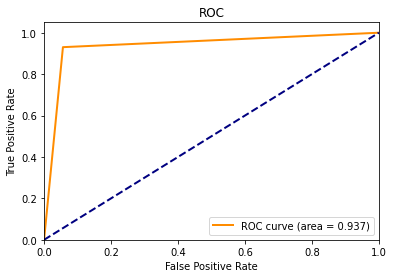

In [55]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.3f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

In [56]:
SV = svm.SVC(probability=True)
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
confusion_matrix(y_test, pred)

array([[71,  0],
       [ 6, 37]], dtype=int64)

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, SV.predict_proba(x_test)[:,1])
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.01408451, 0.01408451,
        0.02816901, 0.02816901, 0.09859155, 0.09859155, 1.        ]),
 array([0.        , 0.02325581, 0.86046512, 0.86046512, 0.90697674,
        0.90697674, 0.95348837, 0.95348837, 1.        , 1.        ]),
 array([1.99999982, 0.99999982, 0.70463127, 0.46343473, 0.39290151,
        0.38844795, 0.34022069, 0.22023388, 0.21152776, 0.02089476]))

In [58]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9934490664919751

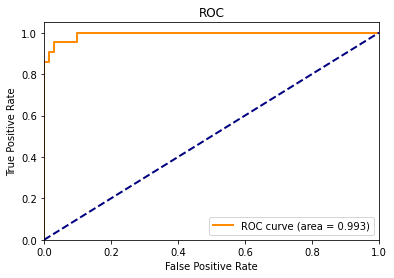

In [59]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.3f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

In [60]:
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)
pred = kn.predict(x_test)
confusion_matrix(y_test, pred)

array([[71,  0],
       [ 5, 38]], dtype=int64)

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, kn.predict_proba(x_test)[:,1])
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.07042254,
        0.15492958, 1.        ]),
 array([0.        , 0.76744186, 0.8372093 , 0.88372093, 1.        ,
        1.        , 1.        ]),
 array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ]))

In [62]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9959056665574844

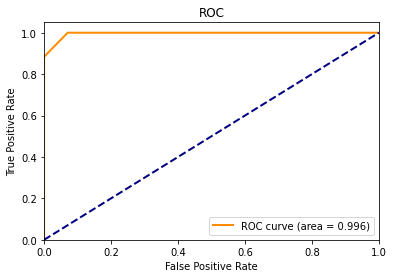

In [63]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.3f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

In [64]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
confusion_matrix(y_test, pred)

C:\Users\user\anaconda3\envs\BasicML\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[70,  1],
       [ 4, 39]], dtype=int64)

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.01408451, 0.01408451,
        1.        ]),
 array([0.        , 0.02325581, 0.88372093, 0.88372093, 1.        ,
        1.        ]),
 array([2.00000000e+00, 1.00000000e+00, 8.46442439e-01, 5.78843314e-01,
        2.22710140e-01, 9.26798492e-04]))

In [66]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9983622666229938

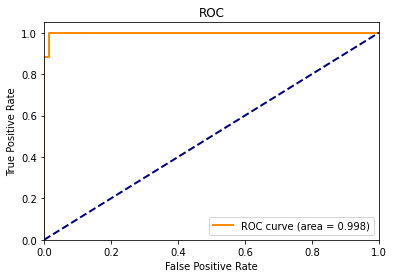

In [67]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.3f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()